<h1><center> PPOL564 | DS1: Foundations </center><h1>
<h3><center> Lecture 24 <br><br><font color='grey'> 
Bayes </font></center></h3>

### Today's Topics

- Introduce Bayes theorem
- Naive Bayes Classification 


In [1]:
import pandas as pd
import numpy as np
import pprint as pp # for printing
import scipy.stats as st # for Normal PDF
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import requests
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

Download data from Github

In [2]:
def download_data(git_loc,dest_name):
    '''
    Download data from Github and save to the notebook's working directory.
    '''
    req = requests.get(git_loc)
    with open(dest_name,"w") as file:
        for line in req.text:
            file.writelines(line)

# civil war data.            
download_data("https://raw.githubusercontent.com/edunford/ppol564/master/lectures/lecture_24/civil_war.csv",
             "civil_war.csv")            
            
# Same data from the 2nd gradient descent lecture 
download_data('https://raw.githubusercontent.com/edunford/ppol564/master/lectures/lecture_22/test_data.csv',
         "test_data.csv")
download_data('https://raw.githubusercontent.com/edunford/ppol564/master/lectures/lecture_22/training_data.csv',
         "training_data.csv")

# Bayes Theorem

Recall that the join probability of event $A$ conditional on $B$ can can be expressed as

<br><br>

$$Pr(A \cap B) = Pr(B | A)Pr(A) = Pr(A|B)Pr(B)$$

<br><br>

Which offers a way defining a conditional probability. 

<br><br>

$$Pr(B | A)Pr(A) = Pr(A|B)Pr(B)$$

<br><br>

\begin{equation}
Pr(B | A) = \frac{Pr(A|B)Pr(B)}{Pr(A)}
\end{equation}

<br><br>

Bayes rule (or Bayes Theorem) offers a way of re-arranging the above. 

<br><br>

\begin{equation}
Pr(A | B) = \frac{Pr(B|A)Pr(A)}{Pr(B)}
\end{equation}

<br><br>

This is useful when $Pr(A | B)$ is easier to calculate than $Pr(B | A)$ (or vice versa) or when the joint probability is unknown. 

Looking at the above equation, we might not know $Pr(B)$. However, we can calculate it by using information that we do have. 

<br><br>

$$ Pr(B) = Pr(B | A)Pr(A) + Pr(B | A^{not})Pr(A^{not}) $$

<br><br>

where 

- $Pr(A^{not}) = 1 - Pr(A)$
- $Pr(B | A^{not}) = 1 - Pr(B^{not}|A^{not})$

This offers a complete formulation of Bayes theorem. 

<br><br>

\begin{equation}
Pr(A | B) = \frac{Pr(B|A)Pr(A)}{Pr(B | A)Pr(A) + Pr(B | A^{not})Pr(A^{not})}
\end{equation}

<br><br>

Where 

- $Pr(B|A)$ is the **likelihood** of event $B$ given $A$.
- $Pr(A)$ is the **prior** probability of event $A$ (i.e. our belief about the likelihood of event $A$)
- $Pr(B)$ or $Pr(B | A)Pr(A) + Pr(B | A^{not})Pr(A^{not})$ is a **normalizing constant** (it ensures the probabilities sum to 1). 
- $Pr(A|B)$ is known as the **posterior** probability. The updated probability of event $A$ given $B$ after learning something from the data. 

<br><br>

Put simply, 

$$\text{Posterior} \propto \text{Likelihood}\times \text{Prior}$$

<br><br>

## Example 1

Let's work through an example. 

> Say we have a test that predicts HIV in a patient. The test successfully detects all infections. However, the test returns positive result for 1% of healthy people. Only .1% of people are believed to have HIV in the population. Now, say you just took the test and received a positive result. **_What's the probability that you have HIV?_**

Let's set the problem up into a Bayesian formulation. 

<br><br>

$$ Pr(HIV = 1 | Test = 1) = \frac{Pr(Test = 1 | HIV = 1)Pr(HIV=1)}{Pr(Test = 1)}$$

<br><br>

Now, let's plug in the information that we know.

- The test perfectly detects all true HIV cases: $Pr(Test = 1 | HIV = 1) = 1$
- The test reports positive in 1% of healthy: $Pr(Test = 1 | HIV = 0) = .01$
- Only .1% of the population has HIV: $Pr(HIV = 1) = .001$

We don't know the probability of a positive test, but we can calculate it from the information provided.

<br><br>

$$ Pr(Test = 1) = Pr(Test = 1 | HIV = 1 ) Pr(HIV = 1) + Pr(Test = 1 | HIV = 0 )Pr(HIV=0) $$

$$ Pr(Test = 1) = 1 (.001) + .01 (1 - .001) $$

$$ Pr(Test = 1) = .01099 $$

<br><br>

Plug everything back into the equation.

<br><br>

$$ Pr(HIV = 1 | Test = 1) = \frac{1 (.001)}{.01099} = .091$$

<br><br>

What's the probability that you have HIV given you tested positive? 9.1% -- really low!

## Example 2

Suppose Facebook is concerned about hate speech on its platform. It developed an algorithm that correctly detects posts with hate speech 80% of the time $Pr(Flagged = 1 | Hate = 1) = .8$. However, it makes mistakes: 14% of the time it incorrectly classifies a normal post as hate speech $Pr(Flagged = 1 | Hate = 0) = .14$. Across it's platform, Facebook estimates that hate speech is rare: only .3% of all posts are considered hate speech. Finally, Facebook wants to rid itself of hate speech entirely, so it blocks the accounts of all people who posted any hate speech content. 

Your friend's account was just block for using hate speech. **_What's the probability that he/she actually posted hate speech?_**

<br><br>

$$ Pr(Hate = 1 | Flagged = 1) = \frac{Pr(Flagged = 1|Hate =1)Pr(Hate =1)}{Pr(Flagged=1)} $$

<br><br>

In [3]:
pr_flagged_given_hs = .8 # Positive Classification given hate speech post
pr_flagged_given_n = .14 # Positive Classification given normal post
pr_hs = .003 # Prop. of hate speech content on FB
pr_n = 1 - pr_hs # Prop. of hate speech 

# Denominator
pr_flagged = (pr_flagged_given_hs * pr_hs) + (pr_flagged_given_n*pr_n)


# Calculate the probability.
(pr_flagged_given_hs*pr_hs)/pr_flagged # only 1.7% 

0.016903789266093816

Let's think about the same set up, but a little differently. Rather than providing probabilities, let's use frequencies. 

- Out of a sample of a 1 million posts, 3000 contain hate speech content.
- Of those 3000, 2400 were correctly flagged by the algorithm.
- The algorithm incorrectly classified 139580 "normal posts" as hate speech.

With this information, what's the probability that your friend &mdash; who was just kicked off the platform &mdash; actually posted hate content?

Here all we need to do is divide the true positives by all posts with a positive classifications (true positives + false positives).

In [4]:
2400/(139580 + 2400)

0.016903789266093816

# Bayes theorem for Modeling

When we construct a model, we're formalizing some **hypothesis** we have about the world. We then collect data and test the validity of that hypothesis.

Bayes theorem provides a way of thinking about the relationship between the data and our hypotheses.

<br><br>

$$Pr(\text{Hypothesis}|\text{Data}) = \frac{Pr(\text{Data}| \text{Hypothesis})Pr(\text{Hypothesis})}{Pr(\text{Data})}$$

<br><br>

The above states that the probability of the hypothesis being true given observed data is equivalent to the likelihood of observing the data given the hypothesis multiplied by the prior belief that the hypothesis is correct. We then normalize the probabilities by dividing by the marginal probability of observing the data.

Recall that $Pr(Data)$ is a normalizing constant. It can be difficult to calculate this value on data, which takes some tricky math to compute but can effectively be ignored for our purposes. 

<br><br>

$$Pr(\text{Hypothesis}|\text{Data}) \propto Pr(\text{Data}| \text{Hypothesis})Pr(\text{Hypothesis})$$

<br><br>

If we have some prior knowledge about the probability of the hypothesis being true &mdash; given prior research or knowledge that we have about the world &mdash; then we can incorporate that information into the model.

If we have _no beliefs_ regarding the probability of the hypothesis (or hypotheses) being correct, then we can assign a uniform (or equal) probability to any likelihood, which effectively turns the prior into a constant. 

<br><br>

$$Pr(\text{Hypothesis}|\text{Data}) \propto Pr(\text{Data}| \text{Hypothesis})$$

<br><br>

> Remember: when we say "hypothesis" we are really saying "parameter" or "model". That is, we add variables to a model because we have some hypothesis that those variables affect the outcome of interest. 

Our aim then is to find the hypothesis that maximizes the probability of observing the data. This optimization method is known as [Maximum a posteriori estimation](https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation) (MAP). When the prior is uniform (that is all hypotheses are equally likely), then MAP is generally equivalent to Maximum Likelihood Estimation (MLE). The take-away is that there is a close relationship  between frequentist and Bayesian methods, much of the discussion centers around the role the prior probability plays in updating our posterior probability. 

We'll talk more about estimation methods next time in class.

### The Impact of the Prior

Most criticism of Bayesian modeling comes from the subjectivity of the prior. The idea is that the researcher can set a prior that returns the desired results, rather than letting the data speak for itself. The specification of the prior is only an issue if the $N$ is small. As the number of observations in the data grow, the less influence the prior will have. 

# Bayes Classifier

Recall a few lectures back we attempted to predict a binary outcome using a linear combination of predictors. If we think carefully, we were trying isolate the probability that $y = 1$ given the values of our predictor.


$$Pr(y=1 | X)$$

Put more generically, 

$$Pr(class | data) $$

That is, the predicted class is conditional on the predictors. 

We can use Bayes theorem here to construct a classifier that uses conditional probability to predict a class. 

<br><br>

$$Pr(class | data) = \frac{Pr(data | class) Pr(class)}{Pr(data)}$$

<br><br>

This calculation can be performed for more than one class. We just need to calculate probability for each class in the problem. We then look at all the probabilities for each class assignment, and choose the largest (i.e. maximize). 

However, such a classifier is **_difficult to compute_**.

> "The conditional probability of the observation based on the class $Pr(data|class)$ is not feasible unless the number of examples is extraordinarily large, e.g. large enough to effectively estimate the probability distribution for all different possible combinations of values. This is almost never the case, we will not have sufficient coverage of the domain." ([Brownlee](https://machinelearningmastery.com/bayes-theorem-for-machine-learning/))

As both the data grows (in either the number of parameters or the size of the data), the estimation task becomes more difficult. 

## Naive Bayes Classifier

We can greatly simplify the above equation by making a simple assumption: that each variable is _independent_ of the other variables in the model. 

<br><br>

$$Pr(class | data) = \frac{Pr( x_1| class)\times Pr( x_2| class) \times \dots \times  Pr(class)}{Pr(data)}$$

<br><br>

where $x_1$ and $x_2$ represent variables in the data. 

We can further simplify by dropping the denominator. As the $Pr(data)$ is a normalizing constant it can be removed.

<br><br>

$$Pr(class | data) = Pr( x_1| class)\times Pr( x_2| class) \times \dots \times  Pr(class)$$

<br><br>

This is known as a **Naive Bayesian Classifier**, or Naive Bayes. The "naivety" stems from the simplifying assumptions we make to the original Bayesian setup. 

## Building a Naive Bayesian Classifier

Let's build a Naive Bayes classifier on a binary outcome ( $y \in [0,1]$ ) with binary predictor variables. Below is a dataset that tracks when a country enters into a civil war given their level of economic development (develop = 1 means a "developed economy", develop = 0 means a "developing economy") and political regime (authoritarian = 1 means an "authoritarian regime", authoritarian = 0 means a "quasi/full-democracy").

In [5]:
np.random.seed(1234)
cw_data = pd.read_csv("civil_war.csv")
train = cw_data.sample(frac=.8).reset_index(drop=True)
test = cw_data.drop(train.index).reset_index(drop=True)
print("Training Data:",train.shape[0],
      "\nTest Data:",test.shape[0])
train.head()

Training Data: 80 
Test Data: 20


,civil_war,developed,authoritarian
0,0,0,0
1,0,1,0
2,0,1,0
3,0,1,1
4,1,0,1


### Calculate Class Probabilities: $Pr(class)$

In [6]:
N = train.shape[0]

# Subset the data by class
cw1 = train.query("civil_war == 1")
cw0 = train.query("civil_war == 0")

# Calculate the probability for each class
pr_cw_1 = cw1.shape[0]/N
pr_cw_0 = cw0.shape[0]/N

# Print the probabilities
print(
f"""
Pr(civil_war = 1): {pr_cw_1}
Pr(civil_war = 0): {pr_cw_0}
""")


Pr(civil_war = 1): 0.3125
Pr(civil_war = 0): 0.6875



### Calculate the Conditional Probabilities $Pr(data | class)$

- $Pr(developed = 1 | CW = 1)$
- $Pr(developed = 0 | CW = 1)$
- $Pr(developed = 1 | CW = 0)$
- $Pr(developed = 0 | CW = 0)$
- $Pr(authoritarian = 1 | CW = 1)$
- $Pr(authoritarian = 0 | CW = 1)$
- $Pr(authoritarian = 1 | CW = 0)$
- $Pr(authoritarian = 0 | CW = 0)$

In [7]:
# Given CW == 1
d1_cw1 = cw1.query("developed == 1").shape[0]/cw1.shape[0]
d0_cw1 = cw1.query("developed == 0").shape[0]/cw1.shape[0]
a1_cw1 = cw1.query("authoritarian == 1").shape[0]/cw1.shape[0]
a0_cw1 = cw1.query("authoritarian == 0").shape[0]/cw1.shape[0]

# Given CW == 0
d1_cw0 = cw0.query("developed == 1").shape[0]/cw0.shape[0]
d0_cw0 = cw0.query("developed == 0").shape[0]/cw0.shape[0]
a1_cw0 = cw0.query("authoritarian == 1").shape[0]/cw0.shape[0]
a0_cw0 = cw0.query("authoritarian == 0").shape[0]/cw0.shape[0]

print(
f"""
Pr(developed = 1 |civil_war = 1): {d1_cw1}
Pr(developed = 0 |civil_war = 1): {d0_cw1}
Pr(developed = 1 |civil_war = 0): {d1_cw0}
Pr(developed = 0 |civil_war = 0): {d0_cw0}
Pr(authoritarian = 1 |civil_war = 1): {a1_cw1}
Pr(authoritarian = 0 |civil_war = 1): {a0_cw1}
Pr(authoritarian = 1 |civil_war = 0): {a1_cw0}
Pr(authoritarian = 0 |civil_war = 0): {a0_cw0}
""")


Pr(developed = 1 |civil_war = 1): 0.4
Pr(developed = 0 |civil_war = 1): 0.6
Pr(developed = 1 |civil_war = 0): 0.6909090909090909
Pr(developed = 0 |civil_war = 0): 0.3090909090909091
Pr(authoritarian = 1 |civil_war = 1): 0.92
Pr(authoritarian = 0 |civil_war = 1): 0.08
Pr(authoritarian = 1 |civil_war = 0): 0.41818181818181815
Pr(authoritarian = 0 |civil_war = 0): 0.5818181818181818



### Make a Prediction

Now we simply multiply together the probabilities for each outcome given some configuration of the variables. 

For example, say we want to predict whether **a country will enter into a civil war given its a developing democracy**. 

In [8]:
prob_cw1 = d0_cw1 * a0_cw1 * pr_cw_1
prob_cw0 = d0_cw0 * a0_cw0 * pr_cw_0

print(f"""
Pr(cw = 1) = {prob_cw1}
Pr(cw = 0) = {prob_cw0}
""")


Pr(cw = 1) = 0.015
Pr(cw = 0) = 0.12363636363636363



$.124$ is greater than $.015$ so we predict "no civil war" ($CW = 0$). 

Now, let's use the probabilities to predict if an authoritarian developing country will enter into a civil war. 

In [9]:
prob_cw1 = d0_cw1 * a1_cw1 * pr_cw_1
prob_cw0 = d0_cw0 * a1_cw0 * pr_cw_0

print(f"""
Pr(cw = 1) = {prob_cw1}
Pr(cw = 0) = {prob_cw0}
""")


Pr(cw = 1) = 0.17250000000000001
Pr(cw = 0) = 0.08886363636363635



$.173$ is greater than $.089$ so we'll predict "civil war" for this observation ($CW = 1$). 

In essence, we do this for every observation in the data. The idea is that we leverage conditional probabilities in the data to predict future class assignment, assuming the data generating process in the training data (i.e. the data we're learning on) is equivalent to the data we test on. 

### Predicting Multiple Observations

Let's now expand this setup so that we can calculate the underlying probabilities and then calculate the predictions for each observation in the data. 

In [10]:
def calc_probs(data,outcome_var=""):
    '''
    Function calculates the class and conditional probabilities in 
    the binary data. 
    
    Note that I'm using dictionaries with tuple keys to keep
    track of the variable, it's val, and the outcome, which we're conditioning on. 
    '''
    # Generate empty dictionary containers.
    class_probs = {};cond_probs = {}
    # Locate all variables that are not the outcome.
    vars = [v for v in data.columns if v != outcome_var]
    # iterate through the class outcomes
    for y, d in data.groupby(outcome_var): 
        # calculate the class probabilities
        class_probs.update({y: d.shape[0]/data.shape[0]})
        for v in vars:
            # calculate the conditional probabilities for each variable given the class.
            pr = d[v].sum()/d.shape[0]
            cond_probs[(v,1,y)] = pr 
            cond_probs[(v,0,y)] = 1 - pr
    return class_probs, cond_probs


# Run
class_probs, cond_probs = calc_probs(train,outcome_var="civil_war")

# Print
print("class probabilities",end="\n\n")
pp.pprint(class_probs)
print("\n")
print("conditional probabilities",end="\n\n")
pp.pprint(cond_probs)

class probabilities

{0: 0.6875, 1: 0.3125}


conditional probabilities

{('authoritarian', 0, 0): 0.5818181818181818,
 ('authoritarian', 0, 1): 0.07999999999999996,
 ('authoritarian', 1, 0): 0.41818181818181815,
 ('authoritarian', 1, 1): 0.92,
 ('developed', 0, 0): 0.3090909090909091,
 ('developed', 0, 1): 0.6,
 ('developed', 1, 0): 0.6909090909090909,
 ('developed', 1, 1): 0.4}


Now we've conveniently stored all the probabilities as dictionaries. Let's build a prediction function that combs through the observations in the data and calculates the probabilities and makes a class prediction. 

In [11]:
def predict(data,class_probs,cond_probs):
    '''
    Function calculates the conditiona probability for membership into each class.
    Then returns both the probabilities and the most likely class. 
    '''
    store_preds = []
    for i,row in data.iterrows():
        pr_1 = 1; pr_0 = 1
        for j in range(1,len(row.index)):
            pr_0 *= cond_probs[(row.index[j],row.values[j],0)]
            pr_1 *= cond_probs[(row.index[j],row.values[j],1)]     
        pr_0 *= class_probs[0]
        pr_1 *= class_probs[1]
        store_preds.append([pr_0,pr_1,max([(pr_0,0),(pr_1,1)])[1]])
    return pd.DataFrame(store_preds,columns=["pr_0","pr_1","pred"])

# Run 
preds = predict(train, class_probs, cond_probs)
preds

,pr_0,pr_1,pred
0,0.123636,0.0150,0
1,0.276364,0.0100,0
2,0.276364,0.0100,0
3,0.198636,0.1150,0
4,0.088864,0.1725,1
...,...,...,...
75,0.276364,0.0100,0
76,0.276364,0.0100,0
77,0.276364,0.0100,0
78,0.276364,0.0100,0


Finally, let's calculate predictive accuracy (i.e. how many correct prediction did we make).

In [12]:
accuracy = sum(train.civil_war == preds.pred)/train.shape[0]
accuracy

0.7625

We obtained predictive accuracy of 76.3% on the training data, not bad!

Let's now try to predict the outcomes in the test data and see how we do.

In [13]:
test_preds = predict(test, class_probs, cond_probs)
test_accuracy = sum(test.civil_war == test_preds.pred)/test.shape[0]
test_accuracy

0.9

We have an out of sample prediction of 90%.

Though the **Naive Bayes Classifier**  is quite simplistic when compared to other modeling strategies (such as a neural net or a gradient boosting machine); however, it proves to be effective on a wide array of prediction tasks. 

## Naive Bayesian Classifier with Continuous Predictors

The modeling strategy outlined above assumes that we have binary or discrete features (i.e. 0/1). However, what if that's not the case, and we have continuous features that we want to use in the prediction task? 

For this exercise, let's use the same data as we did in the gradient descent lecture.

In [14]:
train = pd.read_csv("training_data.csv")
test = pd.read_csv("test_data.csv")
train.head()

,y,x1,x2
0,1.0,-1.085631,-0.748827
1,1.0,0.997345,0.567595
2,1.0,0.282978,0.718151
3,0.0,-1.506295,-0.999381
4,1.0,-0.578600,0.474898


As we did when in the gradient descent lecture, we need a way to map a continuous variable into a probability space. Here we'll use the probability density function for Gaussian (normal) distribution to convert continuous values into probabilities.

Note that we can use information regarding the distribution of each continuous predict and find out where any single point is on that continuous variables probability distribution.

In [15]:
st.norm(0, 1).pdf(-1.69) # using the scipy.stats module

0.09565679616352402

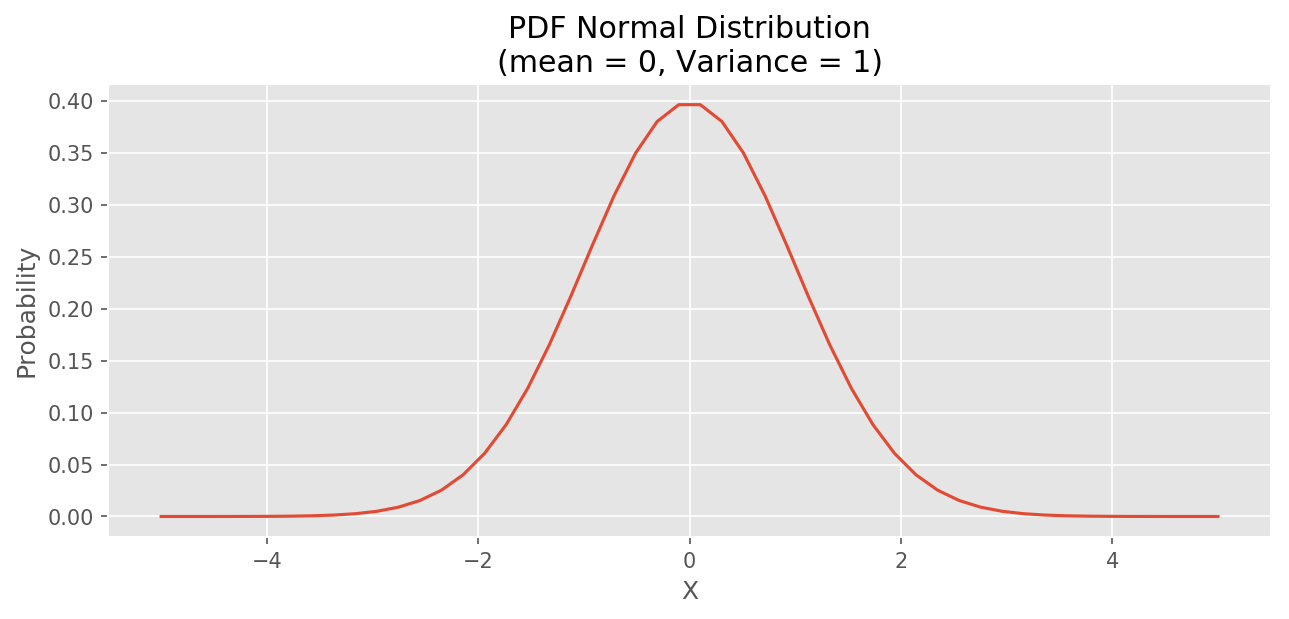

In [16]:
# Calculate the CDF for values in-between the interval of -5 and 5
d = pd.DataFrame([[i,st.norm(0, 1).pdf(i)] for i in np.linspace(-5,5)])

# Plot the density function. 
plt.figure(figsize=(10,4),dpi=150)
ax = sns.lineplot(d[0],d[1])
ax = ax.set(xlabel='X', ylabel='Probability',
            title="PDF Normal Distribution\n(mean = 0, Variance = 1)")
plt.show()

We can calculate the conditional mean and standard deviation for each value of the outcome and then calculate the predictions from there for any one of our continuous variables.

Let's go through the steps again.

### Calculate Class Probabilities: $Pr(class)$

In [17]:
y1 = train.query("y == 1")
y0 = train.query("y == 0")

# Class probabilities.
pr_y1 = y1.shape[0]/train.shape[0]
pr_y0 = y0.shape[0]/train.shape[0]

### Calculate the conditional means/standard deviations

In [18]:
# Collect the mean and standard dev. of each conditional distribution
dist_locs = \
{("x1",1):{'mean':y1.x1.mean(),'sd':y1.x1.std()},
 ("x1",0):{'mean':y0.x1.mean(),'sd':y0.x1.std()},
 ("x2",1):{'mean':y1.x2.mean(),'sd':y1.x2.std()},
 ("x2",0):{'mean':y0.x2.mean(),'sd':y0.x2.std()}
}

# Print
pp.pprint(dist_locs)

{('x1', 0): {'mean': 0.5156773594310682, 'sd': 0.9113594482519166},
 ('x1', 1): {'mean': -0.36705951737634046, 'sd': 0.903305618794902},
 ('x2', 0): {'mean': -0.7234270807398658, 'sd': 0.7924025069188566},
 ('x2', 1): {'mean': 0.4400327732120252, 'sd': 0.7671342801807611}}


### Predict

Let's walk through predicting a single observation.

In [19]:
y,x1,x2 = train.iloc[1,:]
print(y,x1,x2)

1.0 0.9973454465835858 0.5675947260277651


In [20]:
# Prediction for the 1 class
a = st.norm(dist_locs[("x1",1)]['mean'], dist_locs[("x1",1)]['sd']).pdf(x1)
b = st.norm(dist_locs[("x2",1)]['mean'], dist_locs[("x2",1)]['sd']).pdf(x2)
c = pr_y1
pr_1 = a * b * c

# Prediction for the 0 class
a = st.norm(dist_locs[("x1",0)]['mean'], dist_locs[("x1",0)]['sd']).pdf(x1)
b = st.norm(dist_locs[("x2",0)]['mean'], dist_locs[("x2",0)]['sd']).pdf(x2)
c = pr_y0
pr_0 = a * b * c

print(
f'''
    Pr(y == 1| X): {pr_1}
    Pr(y == 0| X): {pr_0}
''')


    Pr(y == 1| X): 0.04553473825311161
    Pr(y == 0| X): 0.018857981798910916



4.55% is greater than 1.89%, so we predict that $y = 1$

### Predicting multiple observations

In [21]:
def predict(data,dist_locs):
    ''''''
    store_preds = []
    for i,row in data.iterrows():
        
        # Get the predictions using a Gaussan distribution
        pr_0 = 1; pr_1 = 1
        for j in range(1,len(row)):
            pr_0 *= st.norm(dist_locs[(row.index[j],0)]['mean'],
                            dist_locs[(row.index[j],0)]['sd']).pdf(row.values[j])
            pr_1 *= st.norm(dist_locs[(row.index[j],1)]['mean'], 
                            dist_locs[(row.index[j],1)]['sd']).pdf(row.values[j])
        pr_0 *= pr_y0
        pr_1 *= pr_y1
        
        # Assign the class designation to the highest probability
        if pr_0 >= pr_1:
            class_pred = 0
        else:
            class_pred = 1
            
        store_preds.append([pr_0,pr_1,class_pred])
        
    return pd.DataFrame(store_preds,columns=["pr_0","pr_1","pred"])

# Run
preds_train = predict(train,dist_locs)

In [22]:
# Predicted output
preds_train.head(10)

,pr_0,pr_1,pred
0,0.017456,0.031683,1
1,0.018858,0.045535,1
2,0.015126,0.104417,1
3,0.006567,0.011217,1
4,0.012673,0.140413,1
5,0.013239,0.000129,0
6,0.000359,0.007559,1
7,0.041775,0.017549,0
8,0.057935,0.007510,0
9,0.020291,0.010154,0


Examine the predictive accuracy of the training data. 

In [23]:
accuracy_train = sum(train.y == preds_train.pred)/train.shape[0]
accuracy_train

0.862

Examine the predictive accuracy on the test data.

In [24]:
preds_test = predict(test,dist_locs)

In [25]:
accuracy_test = sum(test.y == preds_test.pred)/test.shape[0]
accuracy_test

0.862